# Analysis

In [229]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
import nltk
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import networkx as nx

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
from wordcloud import WordCloud
import os

In [135]:
np.random.seed(123)

In [136]:
nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package words to /home/gmas/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /home/gmas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading data

In [137]:
df = pd.read_csv("all_data.csv", converters={"tokens":pd.eval})
df

,casefile,texts,names,clean,facts,len_facts,tokens,len_tokens
0,001-116367.txt,\n\n\nAUSTRIANU v. ROMANIA\n\n\n\n\n\n\n\n\n\n...,AUSTRIANU v. ROMANIA,\n\n\nAUSTRIANU v ROMANIA\n\n\n\n\n\n\n\n\n\n\...,I THE CIRCUMSTANCES OF THE CASE The applicant ...,11804,"[austrianu, romania, terminator, terminator, r...",4401
1,001-116410.txt,\n\n\nD.G. v. POLAND\n\n\n\n\n\n\n\n\n\n\n\n\n...,D.G. v. POLAND,\n\n\nDG v POLAND\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,I THE CIRCUMSTANCES OF THE CASE The applicant ...,35639,"[poland, terminator, terminator, result, count...",6192
2,001-116412.txt,\n\n\nLÁSZLÓ KÁROLY v. HUNGARY (No. 2)\n\n\n\n...,LÁSZLÓ KÁROLY v. HUNGARY (No. 2),\n\n\nLÁSZLÓ KÁROLY v HUNGARY No \n\n\n\n\n\n\...,I THE CIRCUMSTANCES OF THE CASE The applicant ...,3397,"[lászló, károly, hungary, terminator, terminat...",1649
3,001-116592.txt,\n\n\nZUYEV v. RUSSIA\n\n\n\n\n\n\n\n\n\n\n\n\...,ZUYEV v. RUSSIA,\n\n\nZUYEV v RUSSIA\n\n\n\n\n\n\n\n\n\n\n\n\n...,I THE CIRCUMSTANCES OF THE CASE The applicant ...,22374,"[zuyev, russia, terminator, terminator, result...",5543
4,001-116593.txt,\n\n\nVASILIY VASILYEV v. RUSSIA\n\n\n\n\n\n\n...,VASILIY VASILYEV v. RUSSIA,\n\n\nVASILIY VASILYEV v RUSSIA\n\n\n\n\n\n\n\...,I THE CIRCUMSTANCES OF THE CASE The applicant ...,22506,"[vasiliy, vasilyev, russia, terminator, termin...",5155
...,...,...,...,...,...,...,...,...
1059,001-222409.txt,\n\n\nKHURAL AND ZEYNALOV v. AZERBAIJAN (No. 2...,KHURAL AND ZEYNALOV v. AZERBAIJAN (No. 2),\n\n\nKHURAL AND ZEYNALOV v AZERBAIJAN No \n\n...,The first applicant Khural is a newspaper pub...,13902,"[khural, zeynalov, azerbaijan, terminator, ter...",3955
1060,001-222750.txt,\n\n\nFEDOTOVA AND OTHERS v. RUSSIA\n\n\n\n\n\...,FEDOTOVA AND OTHERS v. RUSSIA,\n\n\nFEDOTOVA AND OTHERS v RUSSIA\n\n\n\n\n\n...,THE CIRCUMSTANCES OF THE CASEA The applicants ...,51817,"[fedotova, others, russia, terminator, termina...",15853
1061,001-222783.txt,\n\n\nKREYNDLIN AND OTHERS v. RUSSIA\n\n\n\n\n...,KREYNDLIN AND OTHERS v. RUSSIA,\n\n\nKREYNDLIN AND OTHERS v RUSSIA\n\n\n\n\n\...,The facts of the case may be summarised as fo...,12531,"[kreyndlin, others, russia, terminator, termin...",3868
1062,001-222872.txt,\n\n\nB v. RUSSIA\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,B v. RUSSIA,\n\n\nB v RUSSIA\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,The applicant was born in and lives in Kazan...,26587,"[russia, terminator, terminator, result, count...",4797


## New stopwords

In [212]:
newstops = ["social", "member", "act", "legislation"]

## Vectorizer

In [138]:
df['joined'] = df.tokens.apply(lambda x: " ".join(x))

In [139]:
# Vectorise
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# Matrix of vectors that will be used to train KMeans
matrix = vectorizer.fit_transform(df.joined)


In [170]:
matrix.shape

(1064, 18235)

## Dimensionality Reduction

<span style="color:red"> I think the top_n words can come out from the dimensionality reduction as how much each words contributes to each topic. It think before the top_n words were by cluster. I don't know if there is a big difference between one approach and the others. </span>

In [141]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(matrix.toarray())
print(f"Total variance explained: {np.sum(pca.explained_variance_ratio_):.2f}")

Total variance explained: 0.08


In [201]:
df_pca = pd.DataFrame(data=pca.components_, columns= vectorizer.get_feature_names_out())
df_pca

,ab,aba,abandon,abandoned,abandoning,abandonment,abbasov,abbreviated,abbreviation,abc,...,управління,утврдување,федерации,функција,центр,частное,явка,які,ізолятор,մասին
0,-0.002668,-0.001841,-0.003062,-0.003419,-0.002126,-0.002803,-0.000088,-0.001851,-0.001166,-0.000402,...,0.002048,-0.002318,0.000640,-0.002724,-0.000619,-0.000363,0.001384,0.000907,0.006624,0.000927
1,0.000344,0.002747,-0.005779,-0.006844,-0.002492,-0.003947,0.001004,0.000957,-0.000410,-0.001637,...,0.001047,0.001178,0.001709,0.001102,-0.001193,0.000116,0.002072,-0.000215,0.000373,0.000865
2,0.003429,0.001349,-0.004642,-0.005145,-0.001477,-0.003952,-0.001069,0.001032,-0.001414,-0.002827,...,-0.000319,0.002024,-0.000665,0.002028,-0.000120,-0.000593,-0.001206,0.000982,0.001402,-0.001858
3,-0.001575,-0.000483,-0.001780,-0.000545,0.000599,0.001432,-0.001131,-0.001025,-0.001209,-0.002814,...,0.004146,-0.000830,0.000034,-0.001015,-0.002584,0.000548,-0.000983,0.003782,0.007369,-0.001616
4,0.002278,0.002920,-0.002757,-0.004425,-0.000162,-0.002324,0.001249,0.000851,0.001547,0.005287,...,0.002807,0.005326,0.000522,0.005479,0.000282,0.001259,0.001489,0.003234,0.008070,0.002359


In [206]:
for index, row in df_pca.iterrows():
    print(f"for cluster {index} the most contributing words are")
    print(row.nlargest(10))
    print("\n")

for cluster 0 the most contributing words are
detention    0.141587
cell         0.126509
prison       0.111514
detainee     0.105666
medical      0.099230
detained     0.091579
inmate       0.084159
treatment    0.083592
facility     0.078745
degrading    0.078051
Name: 0, dtype: float64


for cluster 1 the most contributing words are
injury           0.110972
investigation    0.104139
officer          0.100523
illtreatment     0.091553
illtreated       0.081401
station          0.079865
investigator     0.077679
bruise           0.074756
forensic         0.073428
statement        0.067374
Name: 1, dtype: float64


for cluster 2 the most contributing words are
reputation     0.106841
defamation     0.104555
journalist     0.080862
newspaper      0.079994
cell           0.071108
defamatory     0.068664
publication    0.066160
debate         0.061508
honour         0.061095
prison         0.060983
Name: 2, dtype: float64


for cluster 3 the most contributing words are
care          0.11

In [142]:
svd = TruncatedSVD(n_components= 2, random_state=42)
X_svd = svd.fit_transform(matrix.toarray())
print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}")

Total variance explained: 0.03


In [190]:
matrix.shape

(1064, 18235)

In [194]:
pd.DataFrame(data=svd.components_, columns= vectorizer.get_feature_names_out())

,ab,aba,abandon,abandoned,abandoning,abandonment,abbasov,abbreviated,abbreviation,abc,...,управління,утврдување,федерации,функција,центр,частное,явка,які,ізолятор,մասին
0,0.001123,0.001192,0.003038,0.005550,0.001072,0.001523,0.000552,0.000924,0.000946,0.000710,...,0.00075,0.001036,0.000498,0.001215,0.000641,0.000486,0.000543,0.000624,0.001568,0.000704
1,-0.002664,-0.001825,-0.002856,-0.003112,-0.002058,-0.002679,-0.000047,-0.001845,-0.001105,-0.000319,...,0.00207,-0.002342,0.000658,-0.002739,-0.000592,-0.000327,0.001418,0.000926,0.006667,0.000991


In [192]:
matrix.toarray().shape

(1064, 18235)

In [189]:
svd.components_.shape

(2, 18235)

In [208]:
nmf = NMF(n_components= 5, random_state=42)
X_nmf = nmf.fit_transform(matrix.toarray())

In [210]:
df_nmf = pd.DataFrame(data=nmf.components_, columns= vectorizer.get_feature_names_out())
df_nmf

,ab,aba,abandon,abandoned,abandoning,abandonment,abbasov,abbreviated,abbreviation,abc,...,управління,утврдување,федерации,функција,центр,частное,явка,які,ізолятор,մասին
0,0.001341,0.000190,0.020164,0.029214,0.007949,0.01302,0.000957,0.001626,0.004828,0.004852,...,0.000000,0.003229,0.000000,0.004144,0.003295,0.001355,0.000000,0.000000,0.000000,0.000263
1,0.001350,0.000000,0.003451,0.006945,0.000000,0.00000,0.000000,0.000042,0.000000,0.000000,...,0.000000,0.000000,0.000049,0.000000,0.001981,0.000000,0.000583,0.000000,0.002315,0.001289
2,0.000000,0.003356,0.000000,0.002415,0.000000,0.00000,0.002695,0.001329,0.001261,0.000029,...,0.001925,0.000626,0.003401,0.000590,0.000000,0.000766,0.004623,0.000000,0.002206,0.003809
3,0.009526,0.007527,0.000000,0.002390,0.000838,0.00000,0.000582,0.005518,0.001005,0.000000,...,0.000000,0.005641,0.000167,0.006305,0.000754,0.001020,0.000000,0.002112,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.002600,0.000027,0.00000,0.000000,0.000000,0.000000,0.001207,...,0.008227,0.000000,0.000318,0.000000,0.000000,0.001249,0.000000,0.007550,0.018818,0.000477


In [211]:
for index, row in df_nmf.iterrows():
    print(f"for cluster {index} the most contributing words are")
    print(row.nlargest(10))
    print("\n")

for cluster 0 the most contributing words are
child             0.195427
majority          0.165308
constitutional    0.164120
social            0.154130
member            0.154006
act               0.150315
family            0.147164
parent            0.140039
discrimination    0.134890
legislation       0.133600
Name: 0, dtype: float64


for cluster 1 the most contributing words are
cell            0.403458
detention       0.344448
prison          0.319293
detainee        0.281316
inmate          0.269793
space           0.263663
detained        0.251475
toilet          0.244241
prisoner        0.233290
overcrowding    0.232265
Name: 1, dtype: float64


for cluster 2 the most contributing words are
investigation    0.264509
officer          0.264057
injury           0.259250
illtreatment     0.255538
station          0.191577
investigator     0.181882
illtreated       0.173053
forensic         0.170580
arrest           0.167348
incident         0.166280
Name: 2, dtype: float64


for 

## Inertia

In [143]:
def calc_inertia(X, end, step):
    inertia_list = []
    for k in range(1, end, step):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia_list.append(kmeans.inertia_)

    return inertia_list


Text(0.5, 1.0, 'Calculating Inertia for K Clusters')

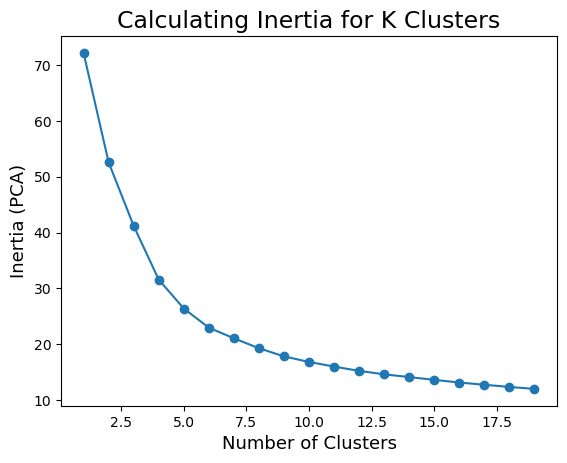

In [144]:
warnings.filterwarnings('ignore')
inertia_list = calc_inertia(X_pca, 20, 1)
plt.plot(range(1, 20, 1), inertia_list)
plt.scatter(range(1, 20, 1), inertia_list)
#plt.scatter(4, inertia_list[4], marker="X", s=300, c="r")

plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia (PCA)", size=13)
plt.title("Calculating Inertia for K Clusters", size=17)

Text(0.5, 1.0, 'Calculating Inertia for K Clusters')

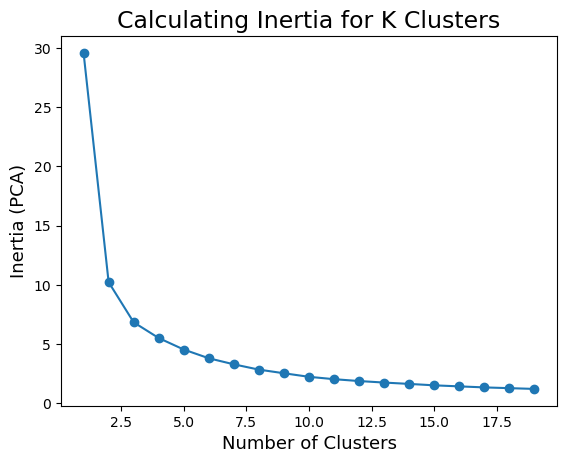

In [145]:
warnings.filterwarnings('ignore')
inertia_list = calc_inertia(X_svd, 20, 1)
plt.plot(range(1, 20, 1), inertia_list)
plt.scatter(range(1, 20, 1), inertia_list)
#plt.scatter(4, inertia_list[4], marker="X", s=300, c="r")

plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia (PCA)", size=13)
plt.title("Calculating Inertia for K Clusters", size=17)

## KMeans

In [177]:
kmeans = KMeans(n_clusters=6, random_state=42)
y_pred = kmeans.fit_predict(X_nmf)
cluster_ids = set(y_pred)
cluster_ids

{0, 1, 2, 3, 4, 5}

## Word Clouds

> 6 clusters

In [178]:
word_positions = {v: k for k, v in vectorizer.vocabulary_.items()}


In [179]:
def word_cloud_generator(in_y_pred, in_cluster_ids, in_X_tfidf, in_word_positions, top_count):

    for in_cluster_id in in_cluster_ids:
        # compute the total tfidf for each term in the cluster
        in_tfidf = in_X_tfidf[in_y_pred == in_cluster_id]
        # numpy.matrix
        tfidf_sum = np.sum(in_tfidf, axis=0)
        # numpy.array of shape (1, X.shape[1])
        tfidf_sum = np.asarray(tfidf_sum).reshape(-1)
        top_indices = tfidf_sum.argsort()[-top_count:]
        term_weights = {in_word_positions[in_idx]: tfidf_sum[in_idx] for in_idx in top_indices}
        wc = WordCloud(width=1200, height=800, background_color="white")
        wordcloud = wc.generate_from_frequencies(term_weights)
        fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis("off")
        fig.suptitle(f"Cluster {in_cluster_id}")
        #plt.show()
        if not os.path.exists('wordclouds'):
            os.makedirs('wordclouds')
        plt.savefig(f"wordclouds/cloud {in_cluster_id}.png")


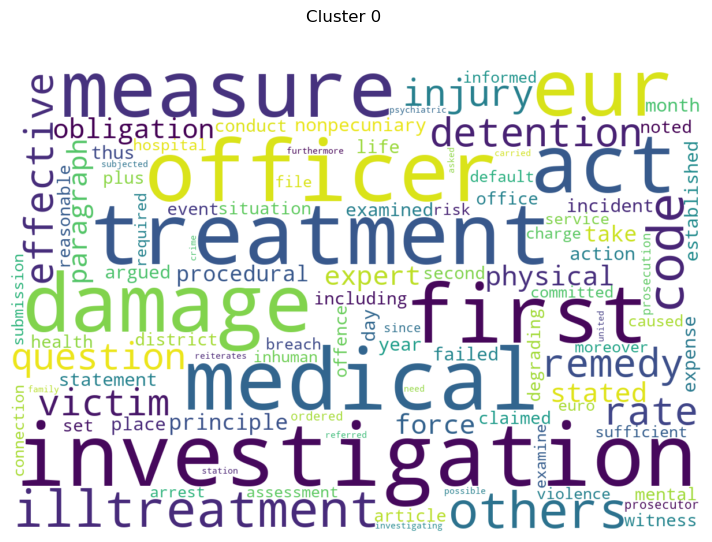

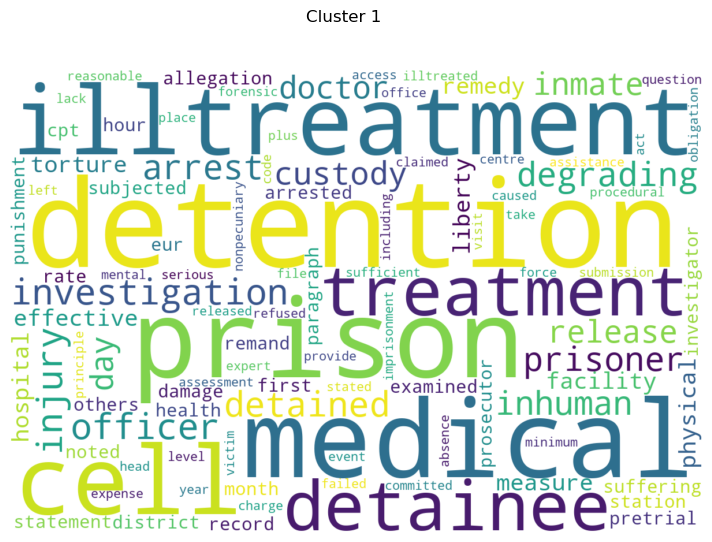

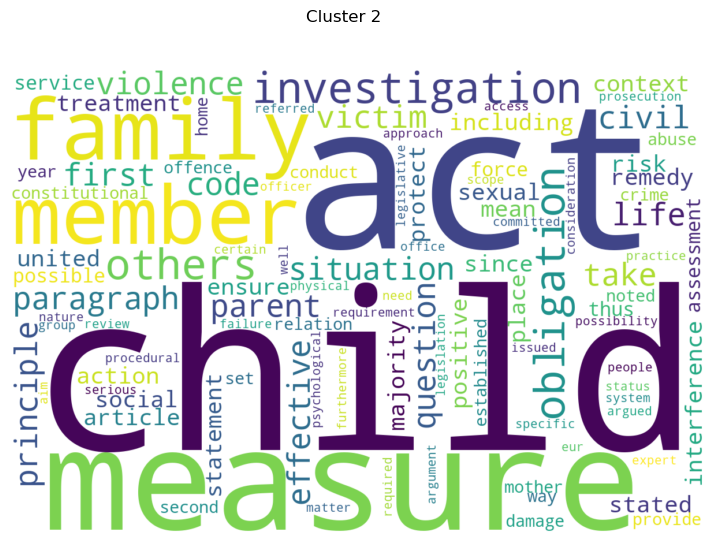

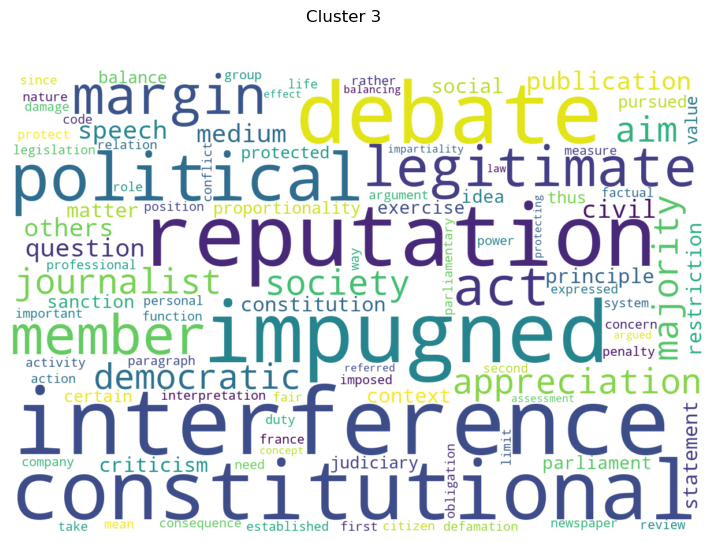

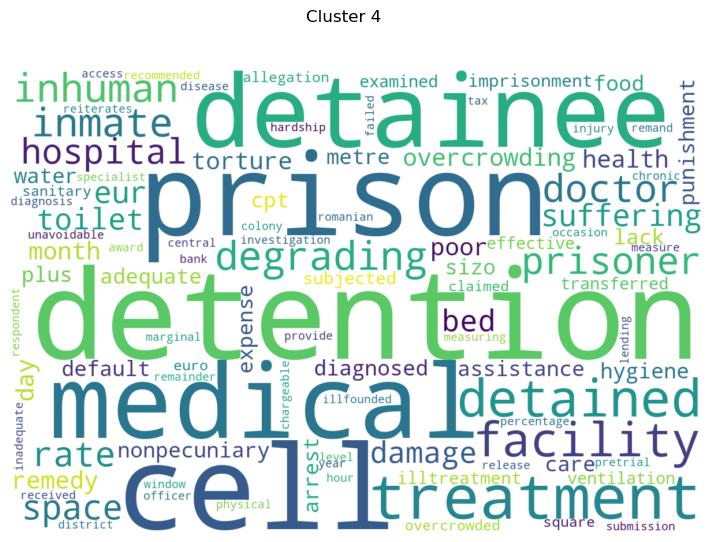

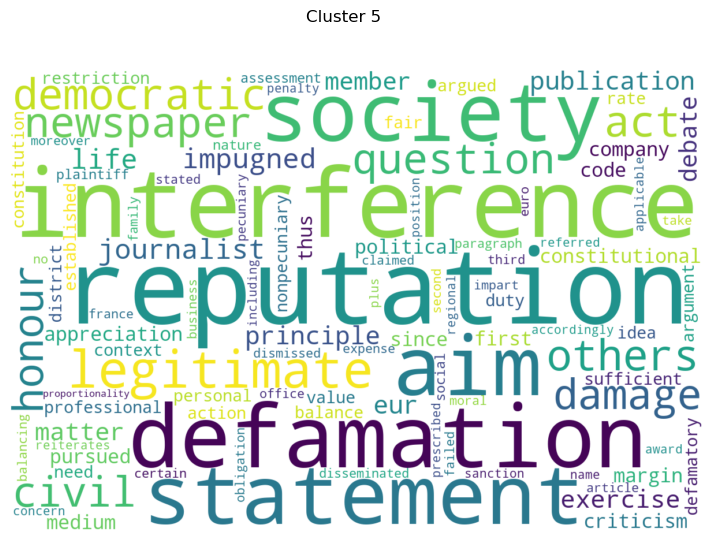

In [180]:
word_cloud_generator(y_pred, cluster_ids, matrix, word_positions, top_count=100)

## Cases closest to centroid

In [150]:
# every row is a cluster, 6 rows, 5 components
kmeans.cluster_centers_

array([[ 0.18562793, -0.10048538,  0.09634164, -0.09694149, -0.02619145],
       [ 0.08974238,  0.16296698, -0.08403349, -0.02155079, -0.01116039],
       [ 0.1892942 , -0.05942785,  0.02366777,  0.14919619,  0.08951957],
       [-0.11727476, -0.08619626, -0.08787884, -0.05547393,  0.05539703],
       [-0.06954093, -0.04784957, -0.06544836,  0.06487237, -0.08702555],
       [-0.17414424,  0.06509076,  0.14833411,  0.00476438,  0.02153481]])

In [151]:
X_pca

array([[ 0.09747773,  0.02509564,  0.00876572,  0.06310261, -0.10875883],
       [ 0.20731782, -0.15597321,  0.03485858,  0.07271724,  0.02954585],
       [ 0.11519425,  0.21089851,  0.03365857,  0.0091209 , -0.12493237],
       ...,
       [ 0.01882121,  0.17189444, -0.0738666 , -0.04667671, -0.09870347],
       [ 0.0338621 ,  0.05221224, -0.09255312,  0.11425305, -0.07576074],
       [-0.00593501,  0.15758909, -0.10914504, -0.04939347, -0.11204087]])

In [152]:
distances = []
for a in kmeans.cluster_centers_:
    for b in X_pca:
        dist = np.linalg.norm(a-b)
        distances.append(dist)
        

In [153]:
distances = np.array(distances).reshape((-1,6))
distances.shape

(1064, 6)

In [154]:
clusterid = np.argmin(results, axis=1)

In [155]:
clusterid.shape

(1064,)

In [156]:
clusterlist = []
for i in range(0,6):
    clusterlist.append(f"clusterid_{i}")
    

In [157]:
distancedf = pd.DataFrame(data=distances, columns=clusterlist)
distancedf

,clusterid_0,clusterid_1,clusterid_2,clusterid_3,clusterid_4,clusterid_5
0,0.252274,0.198041,0.356159,0.191842,0.190151,0.352268
1,0.268139,0.171706,0.158424,0.167129,0.370593,0.368936
2,0.507403,0.430485,0.292059,0.291637,0.401637,0.461864
3,0.355306,0.446025,0.158538,0.378694,0.189053,0.324079
4,0.192714,0.296008,0.302366,0.183724,0.210179,0.350706
...,...,...,...,...,...,...
1059,0.420477,0.347653,0.324177,0.284202,0.429785,0.097369
1060,0.252010,0.411266,0.367319,0.077566,0.320143,0.194575
1061,0.411528,0.173432,0.297320,0.341409,0.318186,0.283320
1062,0.062810,0.321921,0.289497,0.356606,0.064064,0.247983


In [158]:
min_values = []
for i,j in zip(range(len(results)), clusterid):
    min_values.append(results[i,j])

In [159]:
df['cluster'] = clusterid
df['min_values'] = min_values

In [160]:
df

,casefile,texts,names,clean,facts,len_facts,tokens,len_tokens,joined,cluster,min_values
0,001-116367.txt,\n\n\nAUSTRIANU v. ROMANIA\n\n\n\n\n\n\n\n\n\n...,AUSTRIANU v. ROMANIA,\n\n\nAUSTRIANU v ROMANIA\n\n\n\n\n\n\n\n\n\n\...,I THE CIRCUMSTANCES OF THE CASE The applicant ...,11804,"[austrianu, romania, terminator, terminator, r...",4401,austrianu romania terminator terminator result...,4,0.190007
1,001-116410.txt,\n\n\nD.G. v. POLAND\n\n\n\n\n\n\n\n\n\n\n\n\n...,D.G. v. POLAND,\n\n\nDG v POLAND\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,I THE CIRCUMSTANCES OF THE CASE The applicant ...,35639,"[poland, terminator, terminator, result, count...",6192,poland terminator terminator result count phra...,2,0.158784
2,001-116412.txt,\n\n\nLÁSZLÓ KÁROLY v. HUNGARY (No. 2)\n\n\n\n...,LÁSZLÓ KÁROLY v. HUNGARY (No. 2),\n\n\nLÁSZLÓ KÁROLY v HUNGARY No \n\n\n\n\n\n\...,I THE CIRCUMSTANCES OF THE CASE The applicant ...,3397,"[lászló, károly, hungary, terminator, terminat...",1649,lászló károly hungary terminator terminator re...,3,0.291715
3,001-116592.txt,\n\n\nZUYEV v. RUSSIA\n\n\n\n\n\n\n\n\n\n\n\n\...,ZUYEV v. RUSSIA,\n\n\nZUYEV v RUSSIA\n\n\n\n\n\n\n\n\n\n\n\n\n...,I THE CIRCUMSTANCES OF THE CASE The applicant ...,22374,"[zuyev, russia, terminator, terminator, result...",5543,zuyev russia terminator terminator result coun...,2,0.158528
4,001-116593.txt,\n\n\nVASILIY VASILYEV v. RUSSIA\n\n\n\n\n\n\n...,VASILIY VASILYEV v. RUSSIA,\n\n\nVASILIY VASILYEV v RUSSIA\n\n\n\n\n\n\n\...,I THE CIRCUMSTANCES OF THE CASE The applicant ...,22506,"[vasiliy, vasilyev, russia, terminator, termin...",5155,vasiliy vasilyev russia terminator terminator ...,3,0.183936
...,...,...,...,...,...,...,...,...,...,...,...
1059,001-222409.txt,\n\n\nKHURAL AND ZEYNALOV v. AZERBAIJAN (No. 2...,KHURAL AND ZEYNALOV v. AZERBAIJAN (No. 2),\n\n\nKHURAL AND ZEYNALOV v AZERBAIJAN No \n\n...,The first applicant Khural is a newspaper pub...,13902,"[khural, zeynalov, azerbaijan, terminator, ter...",3955,khural zeynalov azerbaijan terminator terminat...,5,0.097387
1060,001-222750.txt,\n\n\nFEDOTOVA AND OTHERS v. RUSSIA\n\n\n\n\n\...,FEDOTOVA AND OTHERS v. RUSSIA,\n\n\nFEDOTOVA AND OTHERS v RUSSIA\n\n\n\n\n\n...,THE CIRCUMSTANCES OF THE CASEA The applicants ...,51817,"[fedotova, others, russia, terminator, termina...",15853,fedotova others russia terminator terminator r...,3,0.077573
1061,001-222783.txt,\n\n\nKREYNDLIN AND OTHERS v. RUSSIA\n\n\n\n\n...,KREYNDLIN AND OTHERS v. RUSSIA,\n\n\nKREYNDLIN AND OTHERS v RUSSIA\n\n\n\n\n\...,The facts of the case may be summarised as fo...,12531,"[kreyndlin, others, russia, terminator, termin...",3868,kreyndlin others russia terminator terminator ...,1,0.173392
1062,001-222872.txt,\n\n\nB v. RUSSIA\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,B v. RUSSIA,\n\n\nB v RUSSIA\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,The applicant was born in and lives in Kazan...,26587,"[russia, terminator, terminator, result, count...",4797,russia terminator terminator result count phra...,0,0.062832


In [214]:
df.to_csv("with_results.csv", index=None)

In [215]:
distancedf.to_csv("distances.csv", index=None)

## Tests

tries a pairwise distance matrix to then feed into a network

In [223]:
pairwise = []
for index_a, row_a in distancedf.iterrows():
    for index_b, row_b in distancedf.iterrows():
        temp = np.linalg.norm(row_a - row_b)
        pairwise.append(temp)
        

In [225]:
deltas = np.array(pairwise).reshape(1064, -1)

In [226]:
deltas

array([[0.        , 0.27109423, 0.43580567, ..., 0.27008661, 0.33106947,
        0.22971291],
       [0.27109423, 0.        , 0.40886898, ..., 0.2833831 , 0.4758103 ,
        0.30506686],
       [0.43580567, 0.40886898, 0.        , ..., 0.34148984, 0.61104561,
        0.42751762],
       ...,
       [0.27008661, 0.2833831 , 0.34148984, ..., 0.        , 0.4580089 ,
        0.21974496],
       [0.33106947, 0.4758103 , 0.61104561, ..., 0.4580089 , 0.        ,
        0.4101034 ],
       [0.22971291, 0.30506686, 0.42751762, ..., 0.21974496, 0.4101034 ,
        0.        ]])

In [227]:
np.fill_diagonal(deltas, 1)

In [228]:
deltas

array([[1.        , 0.27109423, 0.43580567, ..., 0.27008661, 0.33106947,
        0.22971291],
       [0.27109423, 1.        , 0.40886898, ..., 0.2833831 , 0.4758103 ,
        0.30506686],
       [0.43580567, 0.40886898, 1.        , ..., 0.34148984, 0.61104561,
        0.42751762],
       ...,
       [0.27008661, 0.2833831 , 0.34148984, ..., 1.        , 0.4580089 ,
        0.21974496],
       [0.33106947, 0.4758103 , 0.61104561, ..., 0.4580089 , 1.        ,
        0.4101034 ],
       [0.22971291, 0.30506686, 0.42751762, ..., 0.21974496, 0.4101034 ,
        1.        ]])

In [230]:
deltas2 = 1/deltas

In [231]:
deltas2

array([[1.        , 3.68875434, 2.29460073, ..., 3.70251596, 3.02051406,
        4.35325989],
       [3.68875434, 1.        , 2.44577126, ..., 3.52879199, 2.10167793,
        3.27797   ],
       [2.29460073, 2.44577126, 1.        , ..., 2.92834479, 1.63653905,
        2.33908489],
       ...,
       [3.70251596, 3.52879199, 2.92834479, ..., 1.        , 2.18336368,
        4.55073008],
       [3.02051406, 2.10167793, 1.63653905, ..., 2.18336368, 1.        ,
        2.43840946],
       [4.35325989, 3.27797   , 2.33908489, ..., 4.55073008, 2.43840946,
        1.        ]])

In [241]:
G = nx.from_numpy_array(deltas)

In [242]:
com = nx.algorithms.community.louvain_communities(G, weight="weight")

In [249]:
#nx.betweenness_centrality(G, weight="weight")

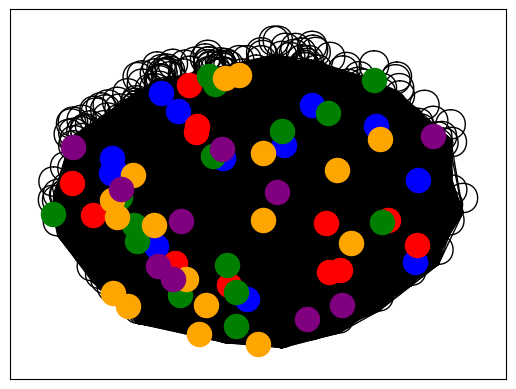

In [246]:
pos = nx.spring_layout(G, seed=123)
nx.draw_networkx_nodes(G, pos=pos, nodelist=com[0], node_color="blue")
nx.draw_networkx_nodes(G, pos=pos, nodelist=com[1], node_color="red")
nx.draw_networkx_nodes(G, pos=pos, nodelist=com[2], node_color="green")
nx.draw_networkx_nodes(G, pos=pos, nodelist=com[3], node_color="orange")
nx.draw_networkx_nodes(G, pos=pos, nodelist=com[4], node_color="purple")
nx.draw_networkx_edges(G, pos=pos)